- Загрузите данные из файла data-logistic.csv. Это двумерная выборка, целевая переменная на которой принимает значения -1 или 1.
- Убедитесь, что выше выписаны правильные формулы для градиентного спуска. Обратите внимание, что мы используем полноценный градиентный спуск, а не его стохастический вариант!
- Реализуйте градиентный спуск для обычной и L2-регуляризованной (с коэффициентом регуляризации 10) логистической регрессии. Используйте длину шага k=0.1. В качестве начального приближения используйте вектор (0, 0).
- Запустите градиентный спуск и доведите до сходимости (евклидово расстояние между векторами весов на соседних итерациях должно быть не больше 1e-5). Рекомендуется ограничить сверху число итераций десятью тысячами.
- Какое значение принимает AUC-ROC на обучении без регуляризации и при ее использовании? Эти величины будут ответом на задание. В качестве ответа приведите два числа через пробел. Обратите внимание, что на вход функции roc_auc_score нужно подавать оценки вероятностей, подсчитанные обученным алгоритмом. Для этого воспользуйтесь сигмоидной функцией: a(x) = 1 / (1 + exp(-w1 x1 - w2 x2)).
- Попробуйте поменять длину шага. Будет ли сходиться алгоритм, если делать более длинные шаги? Как меняется число итераций при уменьшении длины шага?
- Попробуйте менять начальное приближение. Влияет ли оно на что-нибудь?
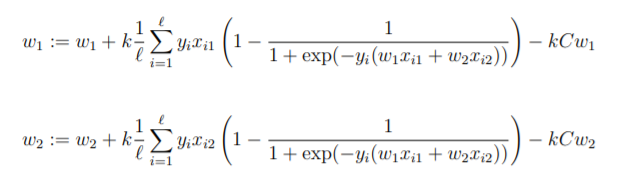

In [2]:
import numpy as np
import pandas as pd
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression

In [3]:
data = pd.read_csv('data-logistic.csv', index_col = False, header = None)

In [4]:
X = data[[1, 2]]
X = X.to_numpy()
y = data[0]

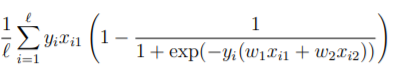

In [5]:
def sigma(x):
    return 1.0 / (1.0 + np.exp(-x))

In [7]:
def logistic_regr(X, y, w, k, epsilon, max_iter, reg = False, C = 0.0):
    for i in range(max_iter):
        wnew = np.array(w) + k * np.mean((np.transpose(X) * np.array(y)) * \
                                             (1 - sigma(np.array(y) * np.dot(X, w))), axis = 1)
        if reg == True:
            wnew -= k * C * np.array(w)
        if np.sqrt(np.sum(np.square(np.array(wnew) - np.array(w)))) <= epsilon:
            break
        w = wnew
    predictions = sigma(np.dot(X, w))
    return predictions

In [8]:
score = roc_auc_score(y, logistic_regr(X, y, [0, 0], 0.1, 1e-5, 10000, False, 0))
score

0.9268571428571428

In [9]:
score_reg = roc_auc_score(y, logistic_regr(X, y, [0, 0], 0.1, 1e-5, 10000, True, 10))
score_reg

0.9362857142857142